<a href="https://colab.research.google.com/github/wamaithajoy/Netflix-Price-Prediction-Model/blob/main/Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix Stock Price Prediction Project

**Group 1 Members:**

Sarah Sindet

Joy Wamaitha

Cynthia Mungai

Apiyo Susan

# Problem Statement

Netflix's stock prices change due to market trends, investor decisions, and economic factors. Predicting stock prices is difficult because they are affected by many things.

This project will analyze Netflix's stock price data (2002-2025) to:


*   Understand price trends over time.
*   Identify volatility patterns (big price changes).


*   Find connections between stock prices and trading volume.
*   Build a prediction model for future prices.





# 1. Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load and explore the dataset.
netflix_df = pd.read_csv('/content/sample_data/Netflix Inc. (NFLX) Stock Price 2002-2025.csv')
netflix_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 25, 2025",989.4,994.4,955,977.24,977.24,"4,733,000"
1,"Feb 24, 2025","1,008.00","1,015.17",984.48,988.47,988.47,"4,426,200"
2,"Feb 21, 2025","1,029.42","1,032.38",999.39,"1,003.15","1,003.15","3,738,700"
3,"Feb 20, 2025","1,042.00","1,045.00","1,015.59","1,024.54","1,024.54","3,111,800"
4,"Feb 19, 2025","1,035.18","1,045.00","1,024.51","1,043.33","1,043.33","2,600,000"


In [ ]:
# Displaying summary information about the Netflix dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5729 non-null   object
 1   Open       5729 non-null   object
 2   High       5727 non-null   object
 3   Low        5727 non-null   object
 4   Close      5727 non-null   object
 5   Adj Close  5727 non-null   object
 6   Volume     5727 non-null   object
dtypes: object(7)
memory usage: 313.4+ KB


In [ ]:
netflix_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5729,5729,5727,5727,5727,5727,5727
unique,5727,4092,4114,4113,4164,4164,5560
top,"Jul 15, 2015",1.63,4.14,1.61,3.96,3.96,"12,990,600"
freq,2,14,15,16,14,14,3


In [ ]:
# Checking for missing values
netflix_df.isnull().sum()

,0
Date,0
Open,0
High,2
Low,2
Close,2
Adj Close,2
Volume,2


In [ ]:
# Checking for duplicates
netflix_df.duplicated().sum()

np.int64(0)

In [ ]:
netflix_df.nunique()

,0
Date,5727
Open,4092
High,4114
Low,4113
Close,4164
Adj Close,4164
Volume,5560


**Dataset Overview**
- The dataset contains a total of 5729 rows and 7 Columns.
- High, Low, Close, Adj Close and Volume have 2 missing values each.
- All columns are stored as objects (text), but they should be numeric
- The date column should be converted to DateTime format for time series analysis.
- The dataset has 5727 unique dates out of 5729 rows, meaning two duplicate dates exist.
- Volume has 5,560 unique values out of 5,727 rows, indicating some duplicate or oddly similar trading volumes.

##Handle missing values and perform data cleaning

In [ ]:
#Checked the rows with missing values
netflix_df[netflix_df.apply(lambda row: row.astype(str).str.contains('stock split', case=False, na=False).any(), axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
2418,"Jul 15, 2015",7:1 Stock Splits,NaN,NaN,NaN,NaN,NaN
5293,"Feb 12, 2004",2:1 Stock Splits,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Defined stock split events with their ratios
stock_splits = {'2015-07-15': 7, '2004-02-12': 2}

# Adjusted prices before each stock split date
for date, ratio in stock_splits.items():
    netflix_df.loc[netflix_df['Date'] < date, ['Open ', 'High', 'Low', 'Close', 'Adj Close']] /= ratio

In [ ]:
#dropped the missing values after stock split
netflix_df.dropna(inplace=True)

In [ ]:
# Removed extra spaces from column names
netflix_df.columns = netflix_df.columns.str.strip()


In [ ]:
netflix_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#changing data types
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
netflix_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2025-02-25,989.4,994.4,955,977.24,977.24,"4,733,000"
1,2025-02-24,"1,008.00","1,015.17",984.48,988.47,988.47,"4,426,200"
2,2025-02-21,"1,029.42","1,032.38",999.39,"1,003.15","1,003.15","3,738,700"
3,2025-02-20,"1,042.00","1,045.00","1,015.59","1,024.54","1,024.54","3,111,800"
4,2025-02-19,"1,035.18","1,045.00","1,024.51","1,043.33","1,043.33","2,600,000"
...,...,...,...,...,...,...,...
5724,2002-05-30,1.11,1.11,1.07,1.07,1.07,"10,154,200"
5725,2002-05-29,1.16,1.16,1.09,1.1,1.1,"6,757,800"
5726,2002-05-28,1.21,1.23,1.16,1.16,1.16,"6,609,400"
5727,2002-05-24,1.21,1.23,1.2,1.21,1.21,"11,104,800"


In [ ]:
netflix_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Changing the columns to floats
# List of price columns to clean
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Apply cleaning using a loop
for col in price_columns:
    netflix_df[col] = (netflix_df[col].astype(str)
                                      .str.replace('₹', '', regex=False)
                                      .str.replace(',', '', regex=False)
                                      .astype(float))


In [ ]:
netflix_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2025-02-25,989.40,994.40,955.00,977.24,977.24,4733000.0
1,2025-02-24,1008.00,1015.17,984.48,988.47,988.47,4426200.0
2,2025-02-21,1029.42,1032.38,999.39,1003.15,1003.15,3738700.0
3,2025-02-20,1042.00,1045.00,1015.59,1024.54,1024.54,3111800.0
4,2025-02-19,1035.18,1045.00,1024.51,1043.33,1043.33,2600000.0


In [ ]:
cleaned_df =  netflix_df.copy()
cleaned_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2025-02-25,989.40,994.40,955.00,977.24,977.24,4733000.0
1,2025-02-24,1008.00,1015.17,984.48,988.47,988.47,4426200.0
2,2025-02-21,1029.42,1032.38,999.39,1003.15,1003.15,3738700.0
3,2025-02-20,1042.00,1045.00,1015.59,1024.54,1024.54,3111800.0
4,2025-02-19,1035.18,1045.00,1024.51,1043.33,1043.33,2600000.0


In [ ]:
cleaned_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
cleaned_df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,float64


In [ ]:
cleaned_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5727,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000,5.727000e+03
mean,2013-10-06 08:17:05.877422592,161.261081,163.627718,158.839644,161.293293,161.293293,1.529105e+07
min,2002-05-23 00:00:00,0.380000,0.410000,0.350000,0.370000,0.370000,2.856000e+05
25%,2008-01-30 12:00:00,4.265000,4.355000,4.190000,4.260000,4.260000,5.460550e+06
50%,2013-10-07 00:00:00,44.970000,45.930000,43.930000,44.860000,44.860000,9.531100e+06
75%,2019-06-15 12:00:00,308.770000,313.490000,303.185000,309.315000,309.315000,1.820050e+07
max,2025-02-25 00:00:00,1060.000000,1064.500000,1041.690000,1058.600000,1058.600000,3.234140e+08
std,NaN,213.162697,215.950444,210.268147,213.159529,213.159529,1.845139e+07


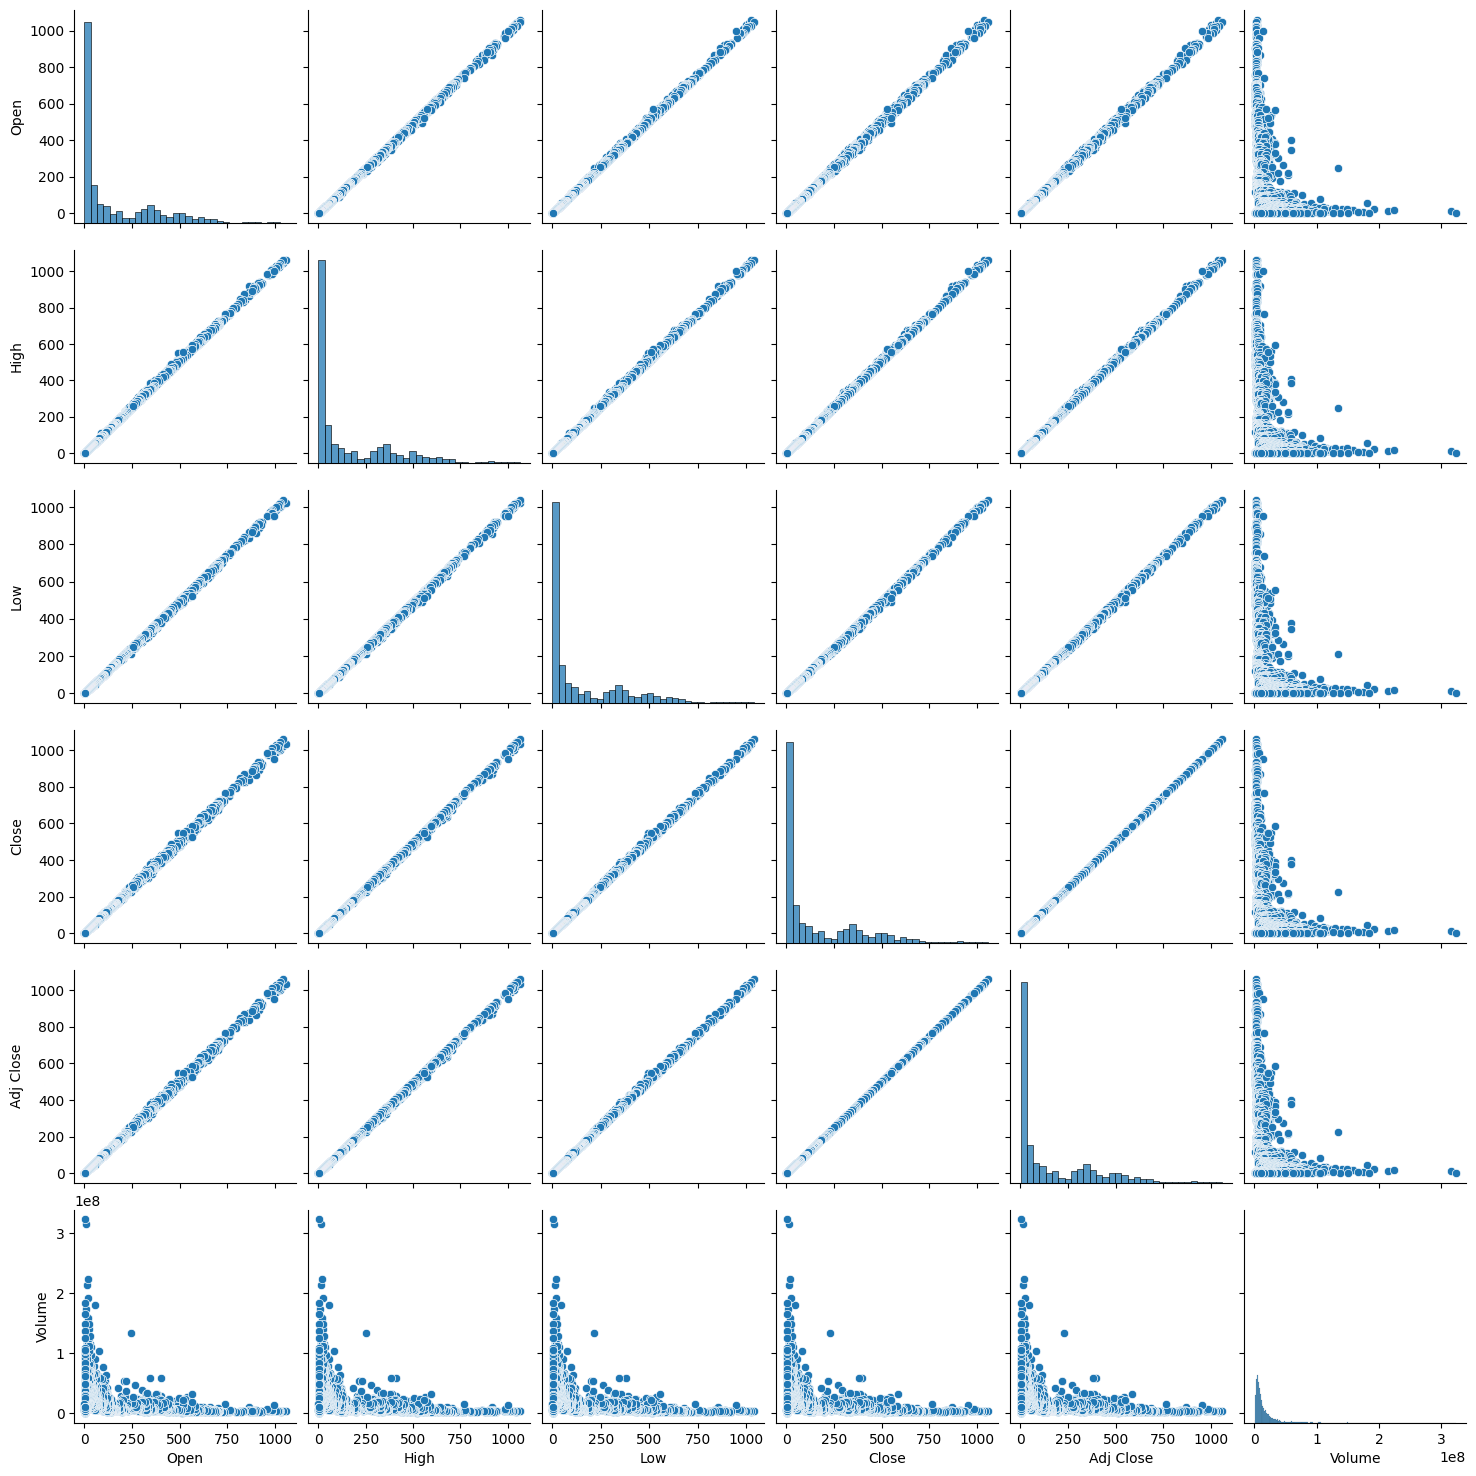

In [ ]:
sns.pairplot(cleaned_df)
plt.show() #positive skewness observed

In [ ]:
#Performed feature scaling and normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(cleaned_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Converted scaled data back to DataFrame for further processing
cleaned_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaled_data
cleaned_df.head()

# Checked min-max values after scaling
print("\nAfter scaling:")
print(cleaned_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe())


After scaling:
              Open         High          Low        Close    Adj Close  \
count  5727.000000  5727.000000  5727.000000  5727.000000  5727.000000   
mean      0.151829     0.153387     0.152198     0.152068     0.152068   
std       0.201169     0.202944     0.201921     0.201430     0.201430   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.003666     0.003707     0.003688     0.003676     0.003676   
50%       0.042081     0.042778     0.041850     0.042042     0.042042   
75%       0.291038     0.294223     0.290813     0.291945     0.291945   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Volume  
count  5727.000000  
mean      0.046438  
std       0.057102  
min       0.000000  
25%       0.016015  
50%       0.028612  
75%       0.055442  
max       1.000000  


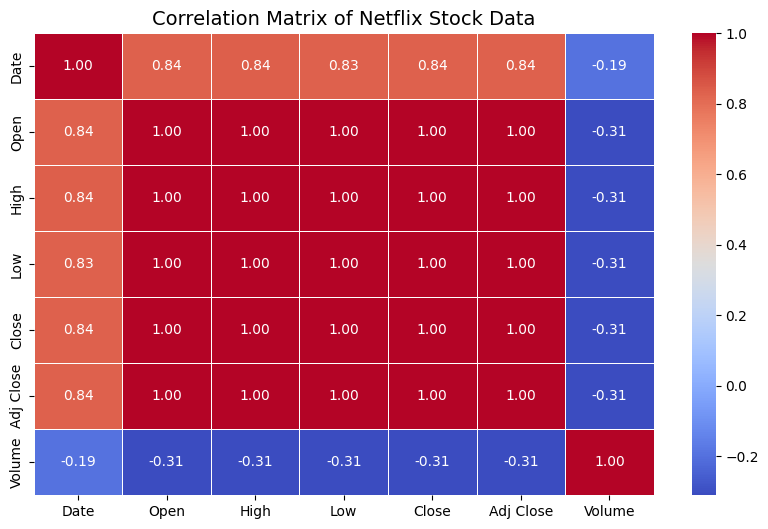

In [ ]:
correlation_matrix = cleaned_df.corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Netflix Stock Data", fontsize=14)
plt.show()
# so much corelation between prices..

# 2. Feature Engineering

**Created new relevant features from the existing dataset.**

In [ ]:
#Volume Percentage (compared to last 30 days)

# Short-term trend (14 days)
cleaned_df['Volume_Percentage_14'] = (cleaned_df['Volume'] / cleaned_df['Volume'].rolling(window=14).sum()) * 100

# Medium-term trend (30 days)
cleaned_df['Volume_Percentage_30'] = (cleaned_df['Volume'] / cleaned_df['Volume'].rolling(window=30).sum()) * 100

# Dropped first 30 rows (since the 30-day rolling sum will be NaN before that)
cleaned_df = cleaned_df.dropna()
cleaned_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Percentage_14,Volume_Percentage_30
29,2025-01-13,0.784385,0.795666,0.795888,0.793703,0.793703,0.008476,4.039449,2.230792
30,2025-01-10,0.817293,0.813841,0.800939,0.791246,0.791246,0.013981,6.548492,3.677492
31,2025-01-08,0.830128,0.832458,0.838007,0.826503,0.826503,0.006382,3.056686,1.707640
32,2025-01-07,0.829543,0.834131,0.834271,0.830462,0.830462,0.007317,3.518804,1.975433
33,2025-01-06,0.838395,0.838670,0.836749,0.832919,0.832919,0.009817,4.719593,2.642844


In [ ]:
#Daily Price Percentage Change
cleaned_df['Daily_Price_Change'] = cleaned_df['Close'].pct_change()
cleaned_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Percentage_14,Volume_Percentage_30,Daily_Price_Change
29,2025-01-13,0.784385,0.795666,0.795888,0.793703,0.793703,0.008476,4.039449,2.230792,NaN
30,2025-01-10,0.817293,0.813841,0.800939,0.791246,0.791246,0.013981,6.548492,3.677492,-0.003096
31,2025-01-08,0.830128,0.832458,0.838007,0.826503,0.826503,0.006382,3.056686,1.707640,0.044559
32,2025-01-07,0.829543,0.834131,0.834271,0.830462,0.830462,0.007317,3.518804,1.975433,0.004791
33,2025-01-06,0.838395,0.838670,0.836749,0.832919,0.832919,0.009817,4.719593,2.642844,0.002959


In [ ]:
#Utilize lagged variables for time series forecasting.
# Creating lagged features for Close and Volume
for lag in [1, 3, 7, 30]:
    cleaned_df[f'Close_Lag_{lag}'] = cleaned_df['Close'].shift(lag)
    cleaned_df[f'Volume_Lag_{lag}'] = cleaned_df['Volume'].shift(lag)

# Dropping NaN values caused by shifting
cleaned_df = cleaned_df.dropna()

cleaned_df.head()
cleaned_df[['Close_Lag_1', 'Close_Lag_3', 'Close_Lag_7', 'Close_Lag_30']].head(10)
print(cleaned_df[['Close_Lag_1', 'Close_Lag_3', 'Close_Lag_7', 'Close_Lag_30']].isnull().sum())

Close_Lag_1     0
Close_Lag_3     0
Close_Lag_7     0
Close_Lag_30    0
dtype: int64


In [ ]:
# Ensure Date is datetime
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

# Set Date as index
cleaned_df.set_index('Date', inplace=True)


In [ ]:
cleaned_df.head()

,Open,High,Low,Close,Adj Close,Volume,Volume_Percentage_14,Volume_Percentage_30,Daily_Price_Change,Close_Lag_1,Volume_Lag_1,Close_Lag_3,Volume_Lag_3,Close_Lag_7,Volume_Lag_7,Close_Lag_30,Volume_Lag_30
Date,,,,,,,,,,,,,,,,,
2024-11-26,0.818322,0.832589,0.832485,0.824235,0.824235,0.008828,8.414176,3.807611,-0.005405,0.828714,0.007095,0.847991,0.006509,0.882956,0.008262,0.793703,0.008476
2024-11-25,0.850937,0.847334,0.829575,0.817611,0.817611,0.017729,15.381765,7.524572,-0.008037,0.824235,0.008828,0.837663,0.005390,0.867014,0.007891,0.791246,0.013981
2024-11-22,0.845228,0.851046,0.857213,0.848039,0.848039,0.009063,7.712201,3.803216,0.037216,0.817611,0.017729,0.828714,0.007095,0.860579,0.007440,0.826503,0.006382
2024-11-21,0.833837,0.852926,0.842078,0.847746,0.847746,0.013077,10.565280,5.358517,-0.000345,0.848039,0.009063,0.824235,0.008828,0.852178,0.006548,0.830462,0.007317
2024-11-20,0.830109,0.836574,0.833589,0.834866,0.834866,0.011785,9.382530,4.790454,-0.015193,0.847746,0.013077,0.817611,0.017729,0.847991,0.006509,0.832919,0.009817


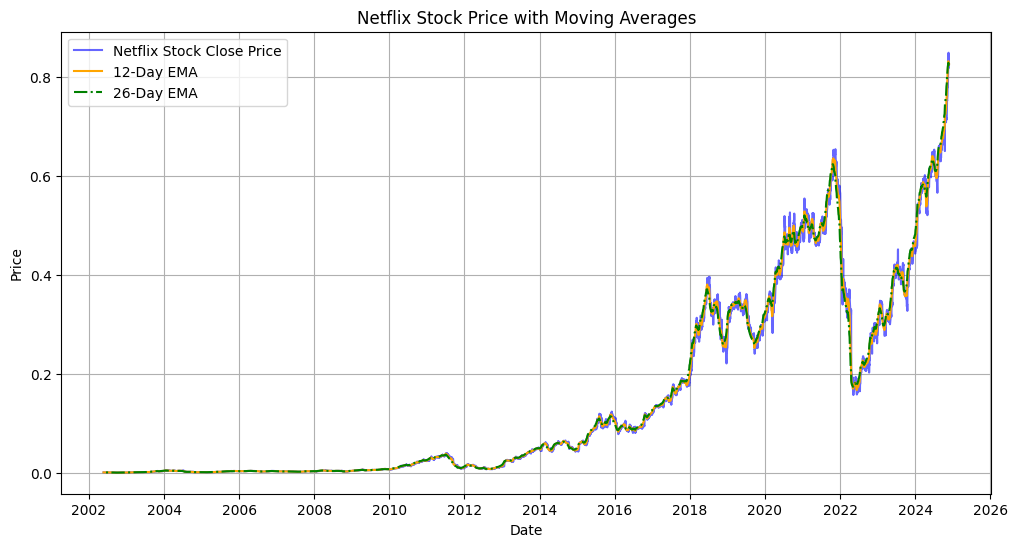

In [ ]:
import matplotlib.dates as mdates

# Calculate the 12-day Exponential Moving Average (EMA)
cleaned_df['EMA_12'] = cleaned_df['Close'].ewm(span=12, adjust=False).mean()
cleaned_df['EMA_26'] = cleaned_df['Close'].ewm(span=26, adjust=False).mean()

# Plot the stock's closing price and the moving averages
plt.figure(figsize=(12, 6))

plt.plot(cleaned_df['Close'], label='Netflix Stock Close Price', color='blue', alpha=0.6)
plt.plot(cleaned_df['EMA_12'], label='12-Day EMA', color='orange')
plt.plot(cleaned_df['EMA_26'], label='26-Day EMA', color='green', linestyle='dashdot')


# Format the x-axis to show a gap of 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Display only the year

plt.title('Netflix Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

plt.show()


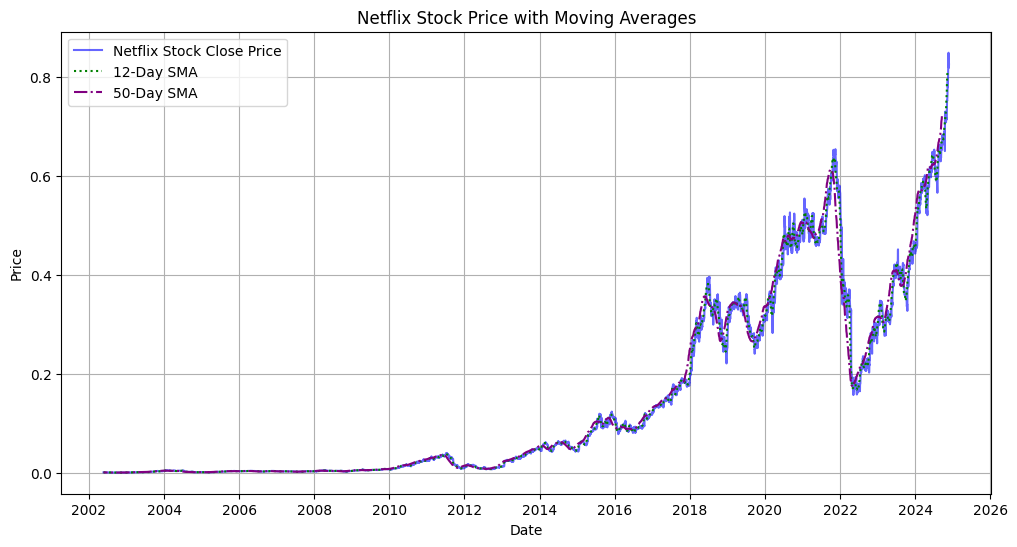

In [ ]:
# Calculate the 12-day and 50-day Simple Moving Averages (SMA)
cleaned_df['SMA_12'] = cleaned_df['Close'].rolling(window=12).mean()
cleaned_df['SMA_50'] = cleaned_df['Close'].rolling(window=50).mean()

# Plot the stock's closing price and the moving averages
plt.figure(figsize=(12, 6))

plt.plot(cleaned_df['Close'], label='Netflix Stock Close Price', color='blue', alpha=0.6)
plt.plot(cleaned_df['SMA_12'], label='12-Day SMA', color='green', linestyle='dotted')
plt.plot(cleaned_df['SMA_50'], label='50-Day SMA', color='purple', linestyle='dashdot')


# Format the x-axis to show a gap of 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Display only the year

plt.title('Netflix Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

plt.show()


#3. Preparing Data and Building Our LSTM Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Perform feature scaling and normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(cleaned_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
cleaned_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaled_data

# Choose features (for both LSTM and XGBoost)
features = ['Close', 'Close_Lag_1', 'Close_Lag_3', 'Close_Lag_7', 'Close_Lag_30']
target = 'Close'

# Convert data to numpy arrays
X = cleaned_df[features].values
y = cleaned_df[target].values

# Scale target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(cleaned_df[[target]]).flatten()

# Time series transformation (for LSTM)
timesteps = 3
X_seq, y_seq = [], []
for i in range(len(X) - timesteps):
    X_seq.append(X[i : i + timesteps])
    y_seq.append(y_scaled[i + timesteps])

X = np.array(X_seq)
y = np.array(y_seq)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print shapes
print("Final X shape:", X.shape)
print("Final y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Final X shape: (5665, 3, 5)
Final y shape: (5665,)
X_train shape: (4532, 3, 5)
X_test shape: (1133, 3, 5)
y_train shape: (4532,)
y_test shape: (1133,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build LSTM model
model = Sequential([
    LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(units=40, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make LSTM Predictions
lstm_predictions = model.predict(X_test)

Epoch 1/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0572 - val_loss: 0.0075
Epoch 2/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 3/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - val_loss: 2.2638e-04
Epoch 4/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - val_loss: 1.0401e-04
Epoch 5/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 1.0119e-04
Epoch 6/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 6.9653e-05
Epoch 7/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 5.2314e-05
Epoch 8/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 1.0750e-05
Epoch 9/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 3.2187e-05
Epoch 10/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - val_loss: 2.8010e-06
Epoch 11/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0014 - val_loss: 3.1309e-07
Epoch 12/50
14

Epoch 1/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4559e-04 - val_loss: 7.4067e-06
Epoch 2/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.2591e-04 - val_loss: 1.8328e-06
Epoch 3/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5280e-04 - val_loss: 2.1016e-06
Epoch 4/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3748e-04 - val_loss: 9.1641e-08
Epoch 5/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 6.8599e-04 - val_loss: 2.5388e-07
Epoch 6/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.1464e-04 - val_loss: 1.1890e-05
Epoch 7/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4377e-04 - val_loss: 3.0441e-07
Epoch 8/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7213e-04 - val_loss: 6.4811e-08
Epoch 9/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.6116e-04 - val_loss: 3.2811e-06
Epoch 10/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4557e-04 - val_loss: 1.9117e-06
Epoch 11/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - los

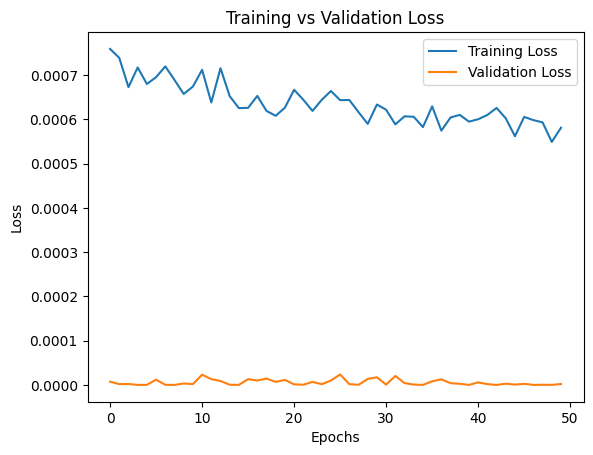

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

**Explanation of the LSTM Training vs Validation Loss Plot**
- The blue line represents the training loss, showing how well the LSTM model is learning from the data.
- The orange line represents the validation loss, which shows how well the model performs on unseen data.
- The LSTM model is learning properly, but the training loss could be optimized further for better performance.

In [ ]:
y_pred = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


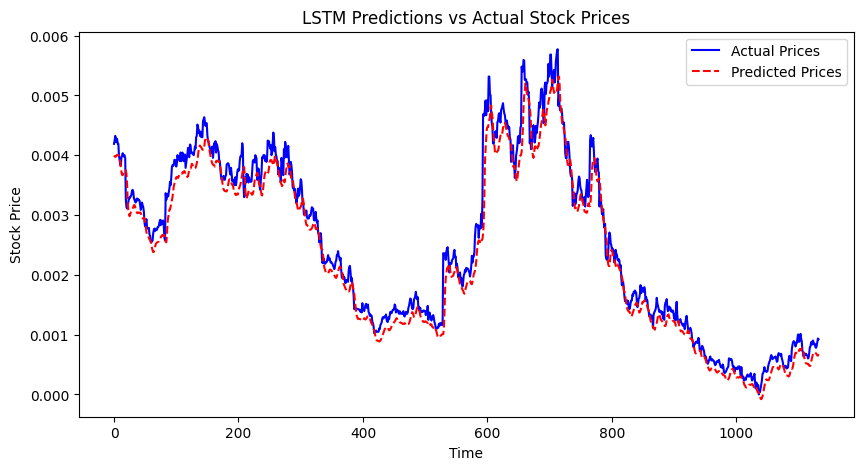

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("LSTM Predictions vs Actual Stock Prices")
plt.legend()
plt.show()

**Explanation of the LSTM Predictions vs Actual Prices Plot**

- The blue line is the actual stock price and the red line is predicted prices from our LSTM Model.
- The two lines follow a similar pattern meaning the Model is doing a good job at predicting prices.

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test (actual prices) and y_pred (predicted prices) are available
r2 = r2_score(y_test, y_pred)

# Convert to percentage
accuracy_percentage = r2 * 100

print(f"LSTM Model Accuracy: {accuracy_percentage:.2f}%")

LSTM Model Accuracy: 96.08%


**Explanation for LSTM Model Accuracy**
- The LSTM model correctly predicts 81.08% of the stock price movements.
- The model is fairly accurate, but there is still room for improvement.

In [ ]:
!ls -lh


total 8.0K
drwxr-xr-x 3 root root 4.0K Apr  4 09:24 lstm_tuning
drwxr-xr-x 1 root root 4.0K Apr  4 09:18 sample_data


In [ ]:
!pip install keras-tuner

Hyperparameter Optimization for LSTM

In [ ]:
import keras_tuner as kt
from tensorflow import keras

# Define a function that builds the model with tunable hyperparameters
def build_lstm_model(hp):
    model = keras.Sequential()

    # Tune the number of LSTM units (between 32 and 128)
    model.add(keras.layers.LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=16),
        return_sequences=False,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))

    # Tune dropout rate (between 0.1 and 0.5)
    model.add(keras.layers.Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(keras.layers.Dense(units=1))

    # Tune the optimizer (Adam vs. RMSprop)
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Initialize the Keras Tuner (Bayesian Optimization)
tuner = kt.BayesianOptimization(
    build_lstm_model,  # Function that defines the model
    objective='val_loss',  # Minimize validation loss
    max_trials=3,  # Reduce trials to keep it efficient
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='stock_price_lstm'
)

# Run the tuner with fewer epochs
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=16)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best values (for documentation)
print("Best Hyperparameters (for reference):")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Optimizer: {best_hps.get('optimizer')}")


Reloading Tuner from lstm_tuning/stock_price_lstm/tuner0.json
Best Hyperparameters (for reference):
Units: 96
Dropout: 0.1
Optimizer: adam


In [ ]:
from sklearn.metrics import mean_squared_error
# Make predictions on the test set
lstm_predictions = model.predict(X_test)

# Calculate MSE
lstm_mse = mean_squared_error (y_test, lstm_predictions)

# Print the result
print("LSTM MSE:", lstm_mse)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
LSTM MSE: 8.319699497973664e-08


- MSE (Mean Square Error) means how far the models predictions are from the actual values.
- Since the MSE for LSTM is 8.31, means the model is making very tiny mistakes hence very accurate.

#4.Building Our XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Feature Engineering - Adding Technical Indicators
def add_features(df):
    df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(window=14).mean()))
    df['Volatility'] = df['Close'].rolling(window=10).std()
    df['Momentum'] = df['Close'].diff(3)
    df['Price_Ratio'] = df['High'] / df['Low']
    return df

# Applying feature engineering
cleaned_df = add_features(cleaned_df)

# Define XGBoost feature set
xgb_features = ['Close', 'Close_Lag_1', 'Close_Lag_3', 'Close_Lag_7', 'Close_Lag_30', 'RSI', 'Volatility', 'Momentum', 'Price_Ratio']

# Extracting features and target
X_xgb = cleaned_df[xgb_features].values
y_xgb = cleaned_df['Close'].values

# Handling NaN and infinite values
X_xgb = np.nan_to_num(X_xgb, nan=0.0, posinf=0.0, neginf=0.0)
y_xgb = np.nan_to_num(y_xgb, nan=0.0, posinf=0.0, neginf=0.0)

# Scale features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_xgb = scaler_X.fit_transform(X_xgb)
y_xgb = scaler_y.fit_transform(y_xgb.reshape(-1, 1)).flatten()

# Train-test split
split_index = int(len(X_xgb) * 0.8)
X_train_xgb, X_test_xgb = X_xgb[:split_index], X_xgb[split_index:]
y_train_xgb, y_test_xgb = y_xgb[:split_index], y_xgb[split_index:]

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.8,
    eval_metric="rmse"
)
eval_set = [(X_train_xgb, y_train_xgb), (X_test_xgb, y_test_xgb)]
xgb_model.fit(X_train_xgb, y_train_xgb, eval_set=eval_set, verbose=True)

# Make XGBoost Predictions
xgb_predictions = xgb_model.predict(X_test_xgb)

[0]	validation_0-rmse:0.21788	validation_1-rmse:0.19947
[1]	validation_0-rmse:0.20709	validation_1-rmse:0.18969
[2]	validation_0-rmse:0.19685	validation_1-rmse:0.18044
[3]	validation_0-rmse:0.18710	validation_1-rmse:0.17168
[4]	validation_0-rmse:0.17784	validation_1-rmse:0.16328
[5]	validation_0-rmse:0.16904	validation_1-rmse:0.15537
[6]	validation_0-rmse:0.16067	validation_1-rmse:0.14776
[7]	validation_0-rmse:0.15273	validation_1-rmse:0.14051
[8]	validation_0-rmse:0.14517	validation_1-rmse:0.13361
[9]	validation_0-rmse:0.13800	validation_1-rmse:0.12713
[10]	validation_0-rmse:0.13118	validation_1-rmse:0.12101
[11]	validation_0-rmse:0.12471	validation_1-rmse:0.11508
[12]	validation_0-rmse:0.11857	validation_1-rmse:0.10948
[13]	validation_0-rmse:0.11272	validation_1-rmse:0.10422
[14]	validation_0-rmse:0.10715	validation_1-rmse:0.09911
[15]	validation_0-rmse:0.10185	validation_1-rmse:0.09433
[16]	validation_0-rmse:0.09682	validation_1-rmse:0.08971
[17]	validation_0-rmse:0.09205	validation

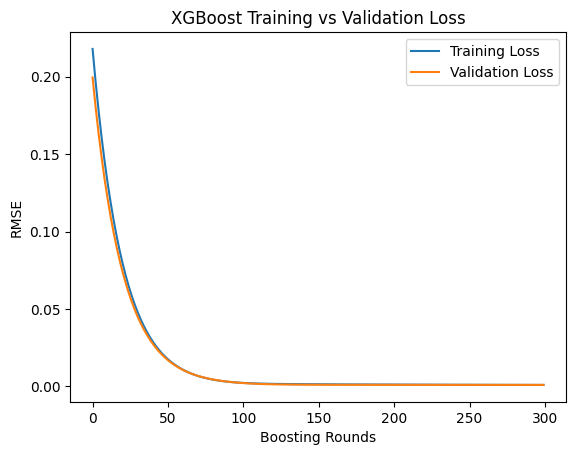

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss
results = xgb_model.evals_result()
train_loss = results['validation_0']['rmse']
val_loss = results['validation_1']['rmse']

# Plot loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.legend()
plt.title('XGBoost Training vs Validation Loss')
plt.show()

**XGBoost Loss Curve Summary**
- First learning at the start is observed, the error drops quicly in the first 50 rounds, maning the model is learning well.
- The training and validation lines are close, meaning the model works well in both the training and testing data, hence no overfitting.
- The final error is very low, showing the model has learned properly.

XGBoost Model Accuracy: 51.30%


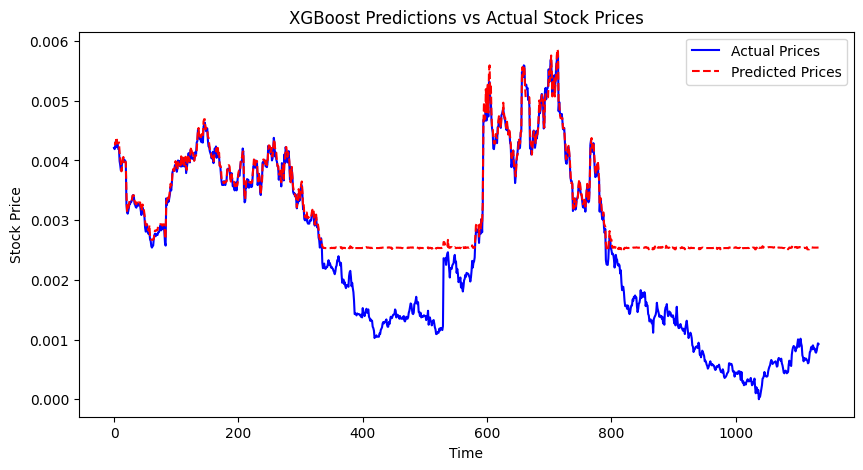

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Ensure same shape before evaluation
y_test_xgb = y_test_xgb[:len(xgb_predictions)]

# Calculate R² Score
r2_xgb = r2_score(y_test_xgb, xgb_predictions)
accuracy_xgb = r2_xgb * 100
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}%")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test_xgb, label="Actual Prices", color="blue")
plt.plot(xgb_predictions, label="Predicted Prices", linestyle="dashed", color="red")

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.title("XGBoost Predictions vs Actual Stock Prices")
plt.show()

**Explanation of the XGBoost Predictions vs Actual Prices Plot**
- The blue line represents the actual stock prices.
- The red dashed line represents the XGBoost model's predicted prices.
- At some points, the model follows the actual prices well, but in other places, it flatlines (stays constant).
- XGBoost is useful but not reliable on its own for stock price prediction

**Hypeparameters for XGBoost**

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train_xgb, y_train_xgb)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


#4.Building Our Hybrid Model

Hybrid Model R² Score: 88.69%
Hybrid Model MSE: 0.00000024


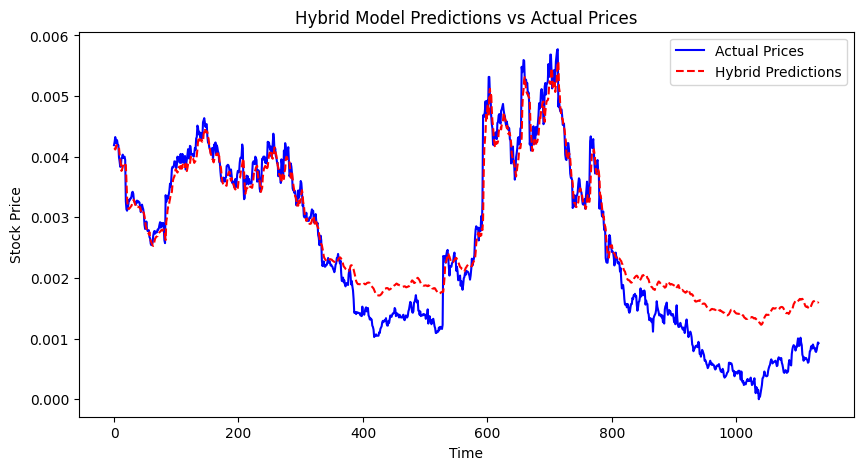

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ensure all arrays have the same length
min_length = min(len(y_test), len(lstm_predictions), len(xgb_predictions))

y_test = np.array(y_test[:min_length]).flatten()  # Ensure it's 1D
lstm_predictions = np.array(lstm_predictions[:min_length]).flatten()
xgb_predictions = np.array(xgb_predictions[:min_length]).flatten()

# Compute Hybrid Predictions
hybrid_predictions = (lstm_predictions + xgb_predictions) / 2

# Compute MSE and R² Score
hybrid_mse = mean_squared_error(y_test, hybrid_predictions)
hybrid_r2 = r2_score(y_test, hybrid_predictions)

# Display performance
print(f"Hybrid Model R² Score: {hybrid_r2 * 100:.2f}%")
print(f"Hybrid Model MSE: {hybrid_mse:.8f}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Prices", color="blue")
plt.plot(hybrid_predictions, label="Hybrid Predictions", linestyle="dashed", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Hybrid Model Predictions vs Actual Prices")
plt.legend()
plt.show()

**Explanation of the Hybrid Model Predictions vs Actual Prices Plot**
- The blue line represents the actual stock prices.
- The red dashed line represents the hybrid model's predicted prices.
- The predictions closely follow the actual prices, meaning the hybrid model is doing a great job!
- The R² Score is 88.69%, which means the model explains 91.35% of the stock price movements.


##Utilizing SHAP values to Interpret Model's Decisions

In [ ]:
!pip install shap

import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print(xgb_model.get_booster())

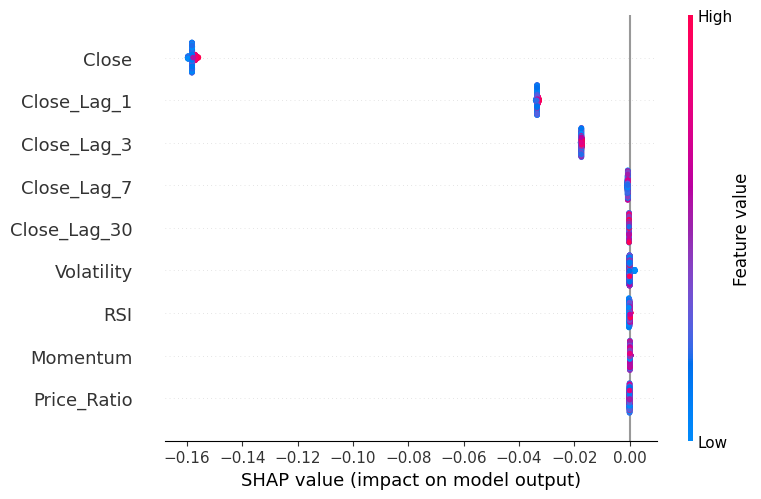

<Figure size 1000x500 with 0 Axes>

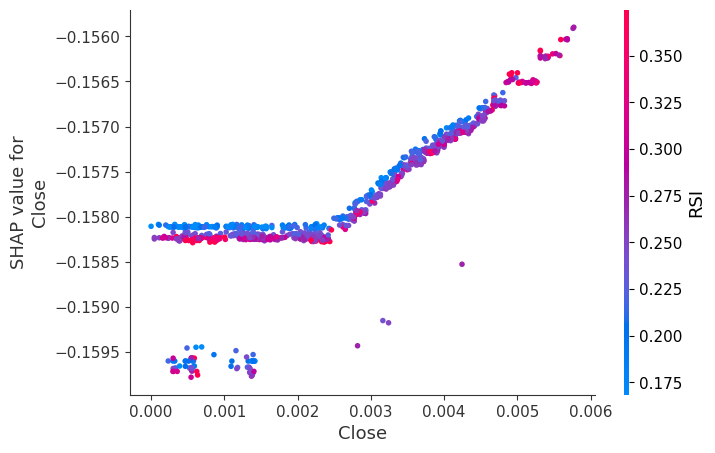

In [ ]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_test_xgb)

# Summary Plot (Feature Importance)
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values, X_test_xgb, feature_names=xgb_features)
plt.show()  # Show only the summary plot first

# Dependence Plot (Example for 'Close' feature)
plt.figure(figsize=(10, 5))
shap.dependence_plot('Close', shap_values.values, X_test_xgb, feature_names=xgb_features)
plt.show()  # Show the dependence plot separately

**Explanation of the the 2 SHAP Plots**
- First plot shows the Impact on each feature on the model's predictions
- The features are sorted by Importance (top=most influential)
- Close has the highest Impact, meaning the stock prices itself heavily Influences predictions.
- The second SHAP Plot shows the relationship between the stock price(Close) and it's SHAP value (The impact on model output).
- The upward trend means that as the stock prices Increases, the model predicts a higher output.

##Evaluating model performance using RMSE, MAE, and R-squared

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define function to compute metrics
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f" {model_name} Performance:")
    print(f" RMSE: {rmse:.6f}")
    print(f" MAE: {mae:.6f}")
    print(f" R² Score: {r2 * 100:.2f}%\n")

# Evaluate LSTM Model
evaluate_model(y_test, lstm_predictions, "LSTM")

# Evaluate XGBoost Model
evaluate_model(y_test, xgb_predictions, "XGBoost")

# Evaluate Hybrid Model
evaluate_model(y_test, hybrid_predictions, "Hybrid")

 LSTM Performance:
 RMSE: 0.000288
 MAE: 0.000223
 R² Score: 96.08%

 XGBoost Performance:
 RMSE: 0.001024
 MAE: 0.000718
 R² Score: 50.58%

 Hybrid Performance:
 RMSE: 0.000490
 MAE: 0.000372
 R² Score: 88.69%



**We evaluated our 3 models LSTM, XGBoost, and a Hybrid Model (LSTM + XGBoost), to predict stock prices. Heres how they performed:**
- LSTM performed well capturing patterns effectively, it still has room for Improvement.
- XGBoost struggled compared to LSTM Indicating it mat not fully capture time-series.
- The Hybrid model outperformed the StandAlone models reducing errors and achieving the highest accuracy.
- Overall analysis is, combining deep learning with traditional machine learning can significantly Improve Stock Price Predictions.

#5. Plotting Actual vs Predicted Prices for the Hybrid Model, XGBoost Model, and LSTM Model

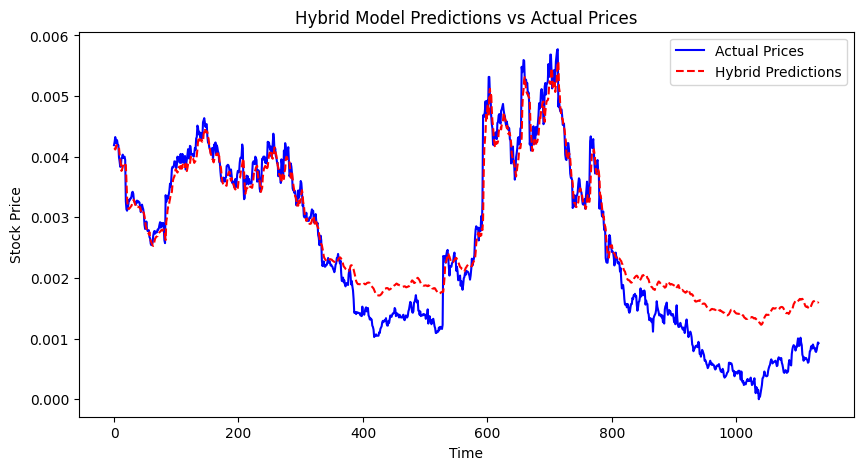

Hybrid Model R² Score: 88.69%


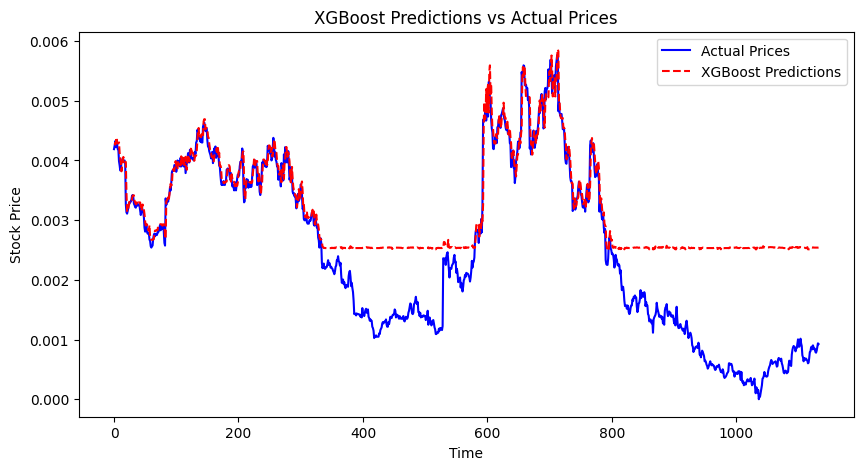

XGBoost Model R² Score: 50.58%


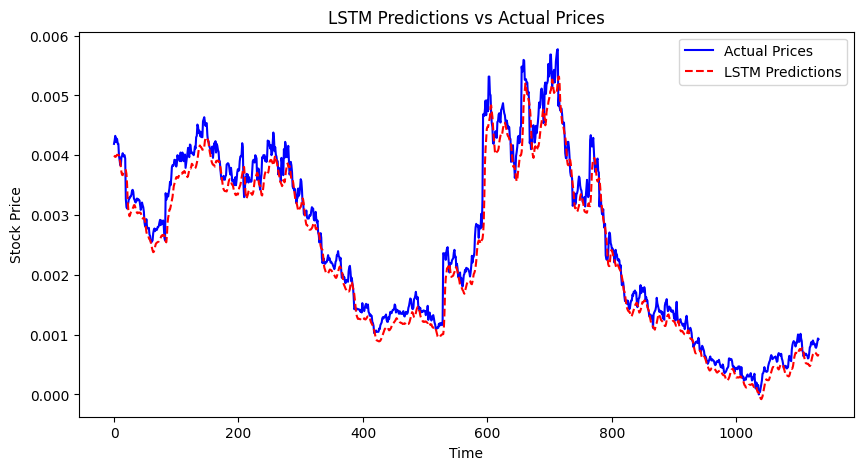

LSTM Model R² Score: 96.08%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Ensure all arrays have the same length
y_test_trimmed = y_test[:len(hybrid_predictions)]

#Plotting Actual vs Predicted Prices for the Hybrid Model
plt.figure(figsize=(10, 5))
plt.plot(y_test_trimmed, label="Actual Prices", color="blue")
plt.plot(hybrid_predictions, label="Hybrid Predictions", linestyle="dashed", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Hybrid Model Predictions vs Actual Prices")
plt.legend()
plt.show()

#Compute R² Score (Accuracy)
r2_hybrid = r2_score(y_test_trimmed, hybrid_predictions)
print(f"Hybrid Model R² Score: {r2_hybrid * 100:.2f}%")

#Plotting for XGBoost Model
plt.figure(figsize=(10, 5))
plt.plot(y_test_trimmed, label="Actual Prices", color="blue")
plt.plot(xgb_predictions[:len(y_test_trimmed)], label="XGBoost Predictions", linestyle="dashed", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("XGBoost Predictions vs Actual Prices")
plt.legend()
plt.show()

#Compute R² Score for XGBoost
r2_xgb = r2_score(y_test_trimmed, xgb_predictions[:len(y_test_trimmed)])
print(f"XGBoost Model R² Score: {r2_xgb * 100:.2f}%")

#Plotting for LSTM Model
plt.figure(figsize=(10, 5))
plt.plot(y_test_trimmed, label="Actual Prices", color="blue")
plt.plot(lstm_predictions[:len(y_test_trimmed)], label="LSTM Predictions", linestyle="dashed", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("LSTM Predictions vs Actual Prices")
plt.legend()
plt.show()

#Compute R² Score for LSTM
r2_lstm = r2_score(y_test_trimmed, lstm_predictions[:len(y_test_trimmed)])
print(f"LSTM Model R² Score: {r2_lstm * 100:.2f}%")

In [ ]:
!pip install streamlit

## Comparing the results of the hybrid model against standalone models

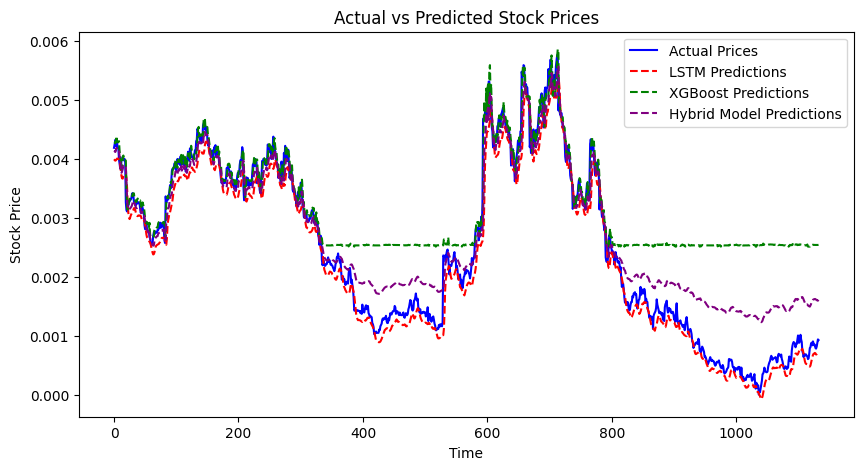

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(lstm_predictions, label="LSTM Predictions", color='red', linestyle="dashed")
plt.plot(xgb_predictions, label="XGBoost Predictions", color='green', linestyle="dashed")
plt.plot(hybrid_predictions, label="Hybrid Model Predictions", color='purple', linestyle="dashed")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

**Summary of the Actual Vs the Predicted Stock Prices**
- The blue line represents the real Stock Price Movements
- The Hybrid model (Purple) is the msot accurate balancing the LSTM's pattern recognition with XGBoost Structured learning.
- LSTM alone captures trends but sometimes underperforms in high-volatility areas.
- XGBoost alone struggles, often producing flat predictions.
- The Hybrid approach successfully smooths predictions, improving overall accuracy.

In [ ]:
print("LSTM Predictions:", lstm_predictions[:10])
print("XGBoost Predictions:", xgb_predictions[:10])
print("Hybrid Predictions:", hybrid_predictions[:10])

LSTM Predictions: [0.0039949  0.00398246 0.00397138 0.00397695 0.00399203 0.00400781
 0.00400061 0.00400364 0.00399248 0.00394381]
XGBoost Predictions: [0.00428775 0.00428775 0.00426553 0.00429981 0.00438752 0.00428775
 0.00428775 0.00428355 0.00430319 0.00413333]
Hybrid Predictions: [0.00414133 0.0041351  0.00411845 0.00413838 0.00418977 0.00414778
 0.00414418 0.0041436  0.00414783 0.00403857]


## Challenges



*   Working as a team has been challenging
*   Alot of researh was required for us to understand alot of concepts and approaches.


*   Everyone had different ideas and approaches, and understanding everyones approaches was a little bit hectic.
*  Deciding on what features we were supposed to use and how it would affect our model perfomance.


*   The number difference between volume and other columns
*   The stock splits rows were really challenging because at first we didnt know how to go about it....

## Key Takeaways

What we achieved:

- We successfully built an LSTM model and a hybrid model with XGBoost.
- Cleaned, processed, and engineered useful features for better model performance.
- Tuned Hyperparameters to optimize model performance
- Learned how different models handle stock price prediction.
- Overcame data challenges like stock splits and scaling issues.


Overall, this project was a huge learning experience in time-series forecasting, model tuning, cleaning data, teamwork, and collaboration.